In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct


In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 14
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)
width, height = plt.rcParams.get('figure.figsize')

In [3]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress
import seaborn as sns

In [4]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [5]:
def divv(Vx, Vy, stepsize):
    dvx_dx = np.gradient(Vx, axis=0)/stepsize
    dvy_dy = np.gradient(Vy, axis=1)/stepsize

    DIV = dvx_dx + dvy_dy
    return DIV

def rotorr(Vx, Vy, stepsize):
    dvx_dy = np.gradient(Vx, axis=1)/stepsize
    dvy_dx = np.gradient(Vy, axis=0)/stepsize

    ROTOR = dvy_dx - dvx_dy
    return ROTOR


<h2>My loading</h2>

In [6]:
Vxm1 = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm1 = Vxm1[::3,::2,::2]/1E5
Vym1 = Vym1[::3,::2,::2]/1E5
Vxm1 = Vxm1.transpose(0, 2, 1)
Vym1 = Vym1.transpose(0, 2, 1)

<h2>muram.read_slice and muram.TauSlice</h2>

In [7]:
path='./'
cube = mio.read_slice(path, 000000, 'tau','0.100')
cubeMS = mio.MuramTauSlice(path, 000000, 0.1)
y = (cube[0][3,::2,::2])/1E5
x = (cube[0][2,::2,::2])/1E5
z = (cube[0][1,::2,::2])/1E5

xx = cubeMS.vy[::2, ::2]/1E5
yy = cubeMS.vz[::2, ::2]/1E5

In [8]:
moja_divergencija = divv(Vxm1[0], Vym1[0], 32)
moj_rotor = rotorr(Vxm1[0], Vym1[0], 32)

In [9]:
muram_RS_div = divv(x, y, 32)
muram_RS_curl = rotorr(x, y, 32)

In [10]:
muram_MTS_div = divv(xx, yy, 32)
muram_MTS_curl = rotorr(xx, yy, 32)

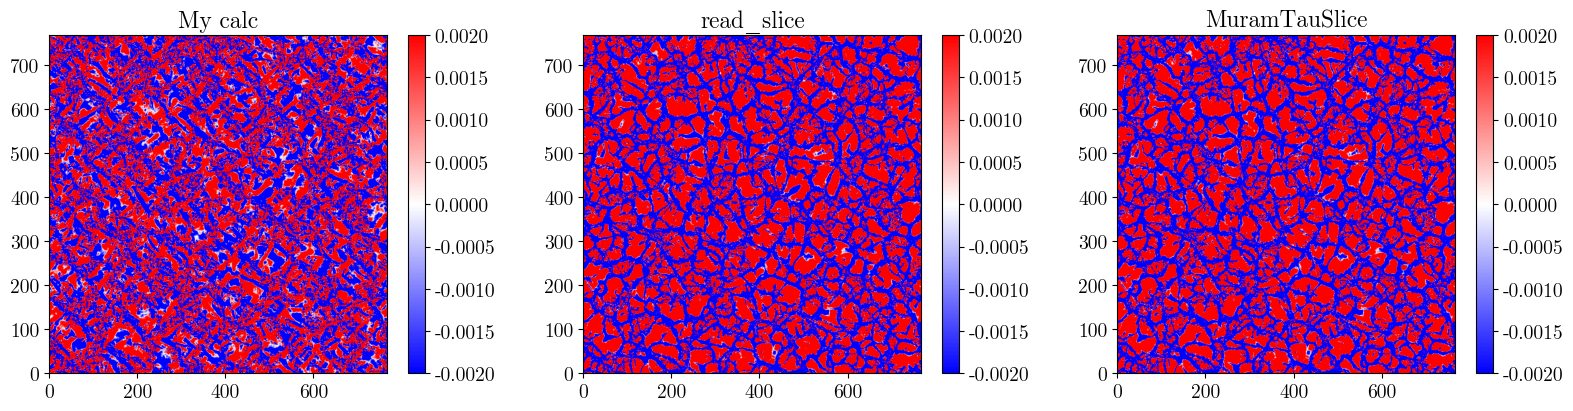

In [11]:
f = plt.figure(constrained_layout=True, figsize=(16,4))
plt.subplot(131)
plt.imshow(moja_divergencija, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("My calc")
plt.colorbar()
plt.subplot(132)
plt.imshow(muram_RS_div, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("read_slice")
plt.colorbar()
plt.subplot(133)
plt.imshow(muram_MTS_div, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("MuramTauSlice")
plt.colorbar()
plt.savefig("BrzineDD.png", dpi = 50, bbox_inches = "tight")

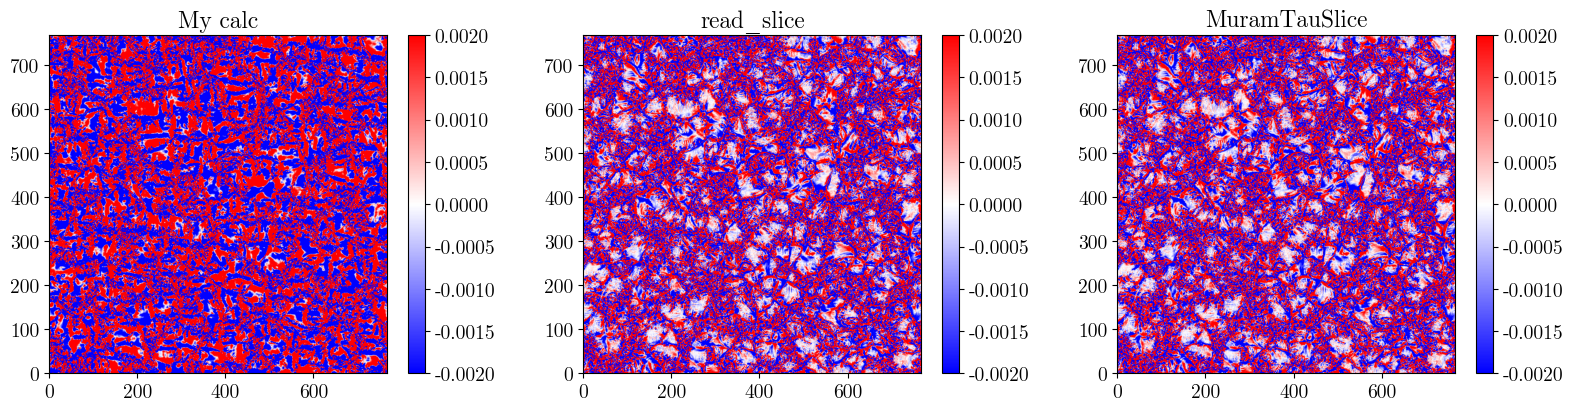

In [12]:
f = plt.figure(constrained_layout=True, figsize=(16,4))
plt.subplot(131)
plt.imshow(moj_rotor, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("My calc")
plt.colorbar()
plt.subplot(132)
plt.imshow(muram_RS_curl, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("read_slice")
plt.colorbar()
plt.subplot(133)
plt.imshow(muram_MTS_curl, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("MuramTauSlice")
plt.colorbar()
plt.savefig("BrzineRR.png", dpi = 50, bbox_inches = "tight")

<h2>Bez uzimanja svakog drugog piksela</h2>

In [13]:
Vxm1 = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
cube = mio.read_slice(path, 000000, 'tau','0.100')
cubeMS = mio.MuramTauSlice(path, 000000, 0.1)

y = (cube[0][3])/1E5
x = (cube[0][2])/1E5
z = (cube[0][1])/1E5

Vxm1 = Vxm1/1E5
Vym1 = Vym1/1E5
Vxm1 = Vxm1.transpose(0, 2, 1)
Vym1 = Vym1.transpose(0, 2, 1)

xx = cubeMS.vy/1E5
yy = cubeMS.vz/1E5

moja_divergencija = divv(Vxm1[0], Vym1[0], 32)
moj_rotor = rotorr(Vxm1[0], Vym1[0], 32)
muram_RS_div = divv(x, y, 32)
muram_RS_curl = rotorr(x, y, 32)
muram_MTS_div = divv(xx, yy, 32)
muram_MTS_curl = rotorr(xx, yy, 32)

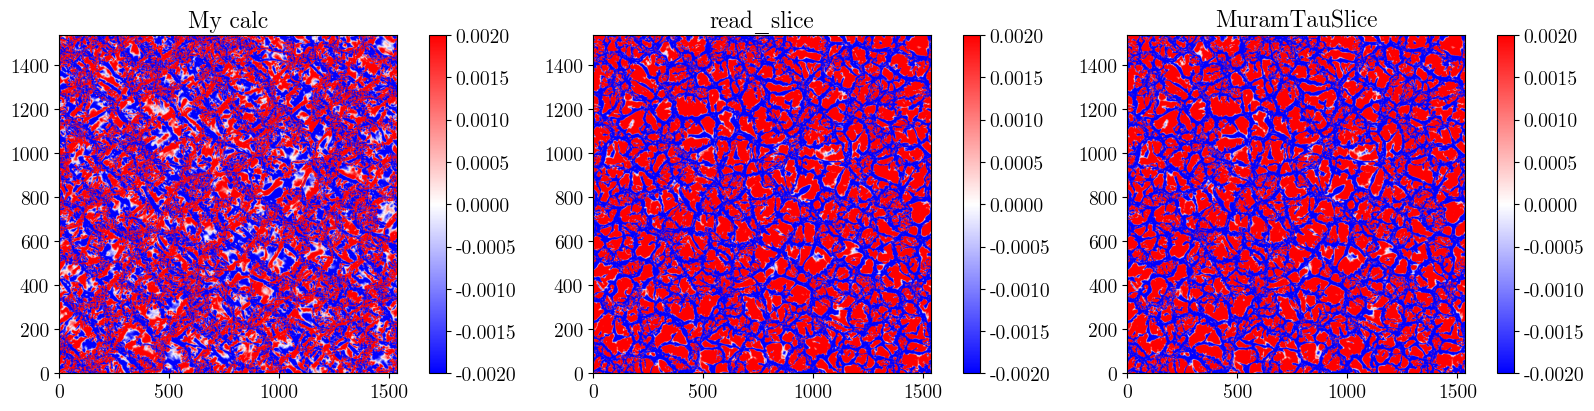

In [14]:
f = plt.figure(constrained_layout=True, figsize=(16,4))
plt.subplot(131)
plt.imshow(moja_divergencija, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("My calc")
plt.colorbar()
plt.subplot(132)
plt.imshow(muram_RS_div, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("read_slice")
plt.colorbar()
plt.subplot(133)
plt.imshow(muram_MTS_div, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("MuramTauSlice")
plt.colorbar()
plt.savefig("BrzineDD1.png", dpi = 50, bbox_inches = "tight")

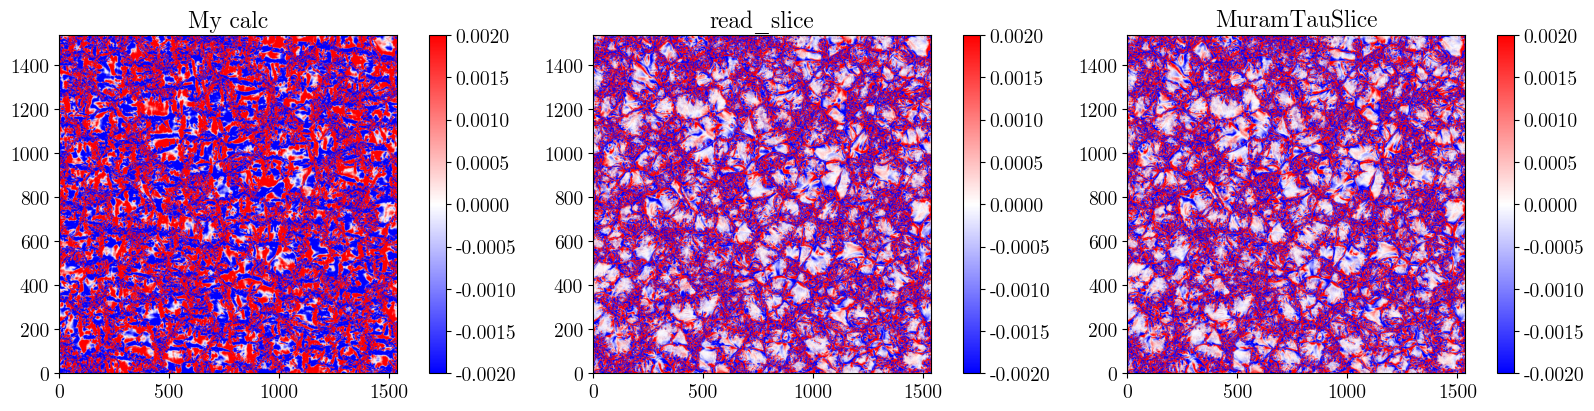

In [15]:
f = plt.figure(constrained_layout=True, figsize=(16,4))
plt.subplot(131)
plt.imshow(moj_rotor, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("My calc")
plt.colorbar()
plt.subplot(132)
plt.imshow(muram_RS_curl, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("read_slice")
plt.colorbar()
plt.subplot(133)
plt.imshow(muram_MTS_curl, origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("MuramTauSlice")
plt.colorbar()
plt.savefig("BrzineRR1.png", dpi = 50, bbox_inches = "tight")